In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,balanced_accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from skopt import BayesSearchCV

In [2]:
data = pd.read_csv("modelers_data.csv")

# 1. Grzebanie w danych

In [3]:
data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,949,msi,MSI Modern 15 B7M-072IN Laptop (Ryzen 5 7530U/...,43990,53,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
1,584,msi,MSI Prestige 16 A13UCX-250IN Laptop (13th Gen ...,119990,73,intel,core i7,14,20,16,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
2,937,acer,Acer Aspire 7 A715-75G Gaming Laptop (10th Gen...,45990,59,intel,core i5,4,8,8,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
3,416,msi,MSI CreatorPro Z16 HX B13VKTO-214IN Laptop (13...,449990,89,intel,core i9,24,32,4,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
4,538,acer,Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Int...,41490,45,intel,core i3,8,8,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1200,windows,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       693 non-null    int64  
 1   brand                       693 non-null    object 
 2   Model                       693 non-null    object 
 3   Price                       693 non-null    int64  
 4   Rating                      693 non-null    int64  
 5   processor_brand             693 non-null    object 
 6   processor_tier              693 non-null    object 
 7   num_cores                   693 non-null    int64  
 8   num_threads                 693 non-null    int64  
 9   ram_memory                  693 non-null    int64  
 10  primary_storage_type        693 non-null    object 
 11  primary_storage_capacity    693 non-null    int64  
 12  secondary_storage_type      693 non-null    object 
 13  secondary_storage_capacity  693 non

<!--                   unique_val | "NULL"                  | kodowanie
brand                          26 |                         | y ?
Model                         991 |                         | useless zmienna ?
Price                         545 |                         |   
Rating                         54 |                         |   
processor_brand                 4 | 'other'                 | oh
processor_tier                 15 | 'other'                 | numerycznie ?
num_cores                      12 |                         | 
num_threads                    15 |                         |
ram_memory                      7 |                         |       
primary_storage_type            2 |                         | oh
primary_storage_capacity        7 |                         |
secondary_storage_type          2 | 'No secondary storage'  | oh
secondary_storage_capacity      4 |                         |
gpu_brand                       5 |                         | oh
gpu_type                        3 |                         | oh ? [integrated,dedicated,apple]
is_touch_screen                 2 |                         |
display_size                   20 |                         |
resolution_width               20 |                         |
resolution_height              22 |                         |
OS                              7 | 'other'                 | oh
year_of_warranty                4 | 'No information'        | stwozyc kolumne no_inf lub dac wartosc 0
-->

- nie ma null-owych wartości (są poukrywane)
    
- zmienne kategoryczne
    - brand                       
    - Model                       
    - processor_brand             
    - processor_tier        
    - primary_storage_type        
    - secondary_storage_type   
    - gpu_brand                   
    - gpu_type                    
    - OS               


In [85]:
#   Column                      Non-Null Count  Dtype       Nulls                  Kodowanie
# ---  ------                      --------------  -----    -------                -------
#  1   brand                       693 non-null    object 
#  2   Model                       693 non-null    object   useless                 odrzucic
#  3   Price                       693 non-null    int64   
#  4   Rating                      693 non-null    int64  
#  5   processor_brand             693 non-null    object   other                   oh
#  6   processor_tier              693 non-null    object   other                   numerycznie
#  7   num_cores                   693 non-null    int64  
#  8   num_threads                 693 non-null    int64  
#  9   ram_memory                  693 non-null    int64  
#  10  primary_storage_type        693 non-null    object                           oh,bin ?
#  11  primary_storage_capacity    693 non-null    int64  
#  12  secondary_storage_type      693 non-null    object   No secondary storage    oh,bin ?
#  13  secondary_storage_capacity  693 non-null    int64  
#  14  gpu_brand                   693 non-null    object                           oh
#  15  gpu_type                    693 non-null    object                           apple ma apple, reszta binary
#  16  is_touch_screen             693 non-null    bool   
#  17  display_size                693 non-null    float64
#  18  resolution_width            693 non-null    int64  
#  19  resolution_height           693 non-null    int64  
#  20  OS                          693 non-null    object   other                   oh
#  21  year_of_warranty            693 non-null    object   No information          numerycznie, kolumna na brak informacji

In [70]:
data.nunique()

index                         693
brand                          23
Model                         693
Price                         422
Rating                         51
processor_brand                 4
processor_tier                 14
num_cores                      12
num_threads                    15
ram_memory                      6
primary_storage_type            2
primary_storage_capacity        7
secondary_storage_type          2
secondary_storage_capacity      4
gpu_brand                       5
gpu_type                        3
is_touch_screen                 2
display_size                   18
resolution_width               16
resolution_height              18
OS                              5
year_of_warranty                4
dtype: int64

In [84]:
# gpu appla ma gpu_type apple
data[['gpu_brand','gpu_type']].value_counts()

gpu_brand  gpu_type  
intel      integrated    314
nvidia     dedicated     247
amd        integrated    110
           dedicated      10
apple      apple           9
arm        integrated      2
intel      dedicated       1
Name: count, dtype: int64

In [87]:
data.OS.unique()

array(['windows', 'dos', 'mac', 'chrome', 'other'], dtype=object)

# Analiza

<Axes: xlabel='Rating', ylabel='Count'>

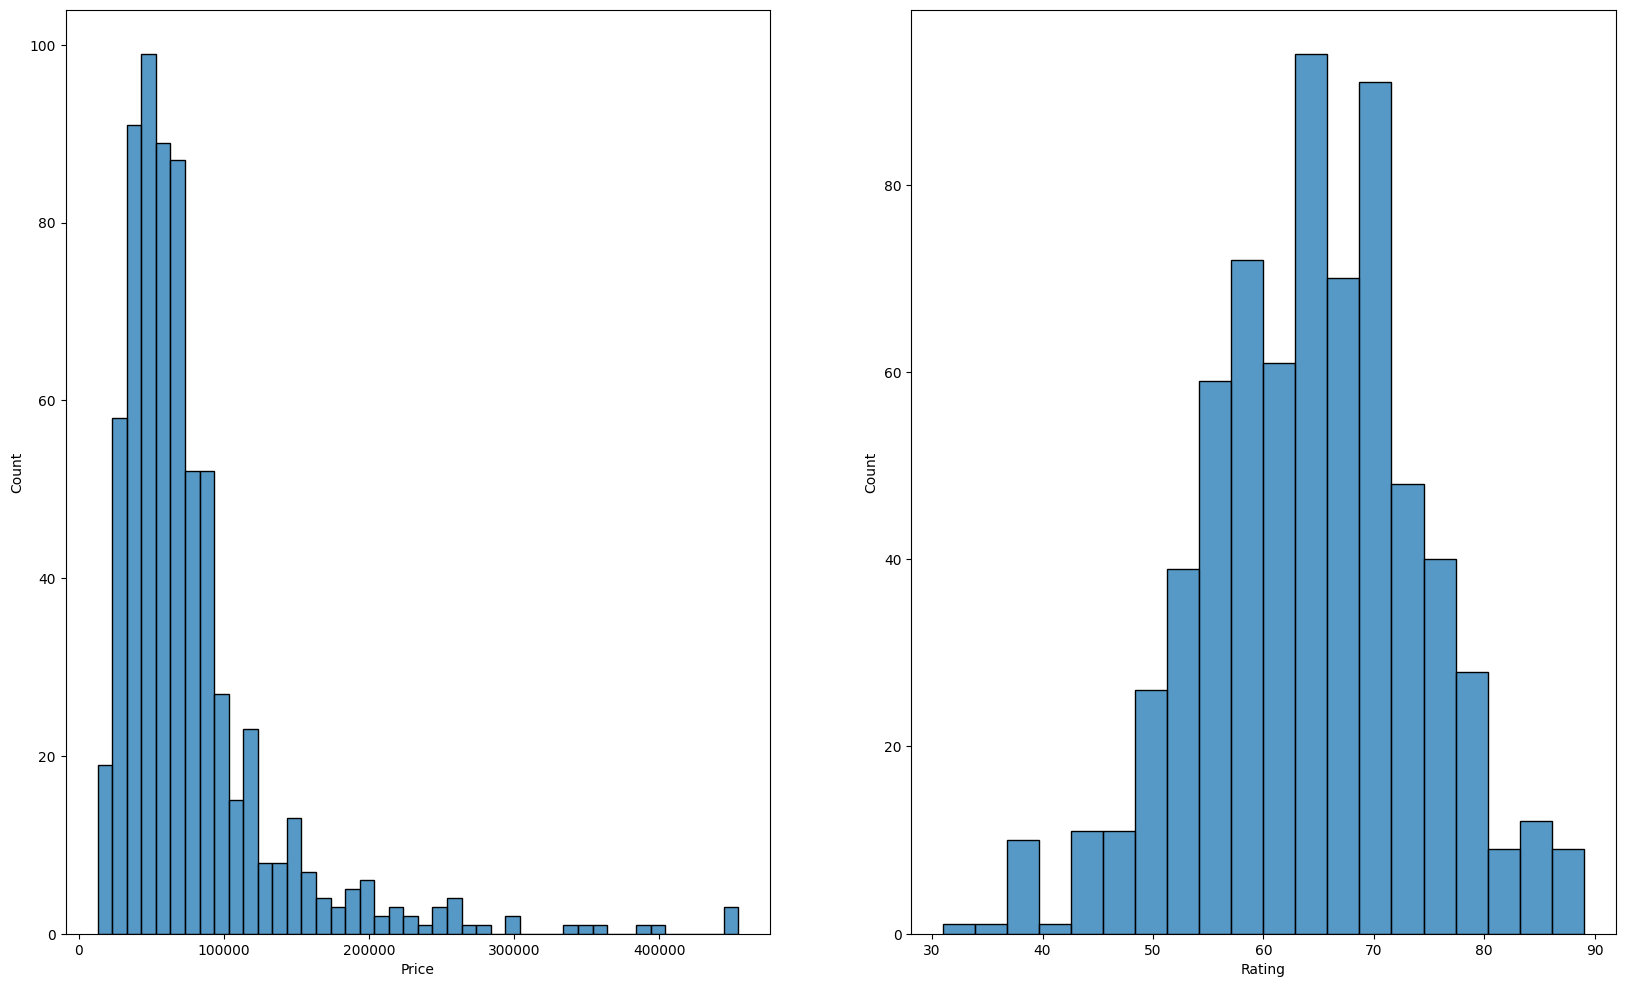

In [62]:
figure,ax = plt.subplots(1,2,figsize = (20,12))
ax = ax.flatten()
sns.histplot(data=data,x='Price',ax=ax[0])
sns.histplot(data=data,x='Rating',ax=ax[1])


In [89]:
data.groupby("brand").index.count()

brand
acer          60
apple          9
asus         147
avita          2
chuwi          3
dell          69
fujitsu        2
gigabyte       2
honor          2
hp           150
infinix        8
lenovo       147
lg             5
microsoft      2
msi           67
primebook      1
realme         1
samsung        3
tecno          2
ultimus        3
walker         1
wings          3
zebronics      4
Name: index, dtype: int64

In [20]:
data.head(20)

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,949,msi,MSI Modern 15 B7M-072IN Laptop (Ryzen 5 7530U/...,43990,53,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
1,584,msi,MSI Prestige 16 A13UCX-250IN Laptop (13th Gen ...,119990,73,intel,core i7,14,20,16,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
2,937,acer,Acer Aspire 7 A715-75G Gaming Laptop (10th Gen...,45990,59,intel,core i5,4,8,8,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
3,416,msi,MSI CreatorPro Z16 HX B13VKTO-214IN Laptop (13...,449990,89,intel,core i9,24,32,4,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
4,538,acer,Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Int...,41490,45,intel,core i3,8,8,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1200,windows,1
5,832,dell,Dell Alienware m16 Gaming Laptop (13th Gen Cor...,220990,83,intel,core i7,16,24,16,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,1
6,866,hp,HP 15-fd0011TU Laptop (13th Gen Core i5/ 8GB/ ...,60490,54,intel,core i5,10,12,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
7,448,lenovo,Lenovo IdeaPad Slim 3i 82X70032IN Laptop (13th...,42499,43,intel,core i3,5,6,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
8,926,asus,Asus Vivobook Go 15 2023 E1504GA-NJ322WS Lapto...,39242,51,intel,core i3,8,8,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
9,239,hp,HP 15s-fr4001TU Laptop (11th Gen Core i5/16GB/...,52490,65,intel,core i5,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1


In [43]:
a = data.loc[data.gpu_type=='integrated'].iloc[1,2]
print(a)
s = a.find('(')
e = a.find(')')
lista = a[s+1:e].split('/')
lista_final = list(map(str.strip,lista))
print(lista_final)

Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Intel Core i3 N305/ 8GB/ 512GB SSD/ Win11 Home)
['Intel Core i3 N305', '8GB', '512GB SSD', 'Win11 Home']


In [46]:
data.loc[data.gpu_type=='integrated'].iloc[1,:]

index                                                                       538
brand                                                                      acer
Model                         Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Int...
Price                                                                     41490
Rating                                                                       45
processor_brand                                                           intel
processor_tier                                                          core i3
num_cores                                                                     8
num_threads                                                                   8
ram_memory                                                                    8
primary_storage_type                                                        SSD
primary_storage_capacity                                                    512
secondary_storage_type                  

In [85]:
data_copy = data.copy()

In [88]:
df_test = pd.DataFrame({'cpu_b':[],'cpu':[],'os':[],'gpu':[]})
for i in  range(data.shape[0]):
    a = data.iloc[i,2]
    s = a.find('(')
    e = a.find(')')
    lista = a[s+1:e].split('/')
    lista_final = list(map(str.strip,lista))
    df_test.loc[len(df_test)] = [data.iloc[i,14],lista_final[0],lista_final[3],lista_final[4] if (len(lista_final)==5) else "integrated"]



In [87]:
df_test.cpu.unique()
# różne nazewnictwo tych samych np. 'AMD Ryzen 5-5600H', 'AMD Ryzen 5 5600H'

array(['Ryzen 5 7530U', '13th Gen Core i7', '10th Gen Core i5',
       '13th Gen Core i9', 'Intel Core i3 N305', '13th Gen Core i5',
       '13th Gen Core i3', 'Intel Core i3-N305', '11th Gen Core i5',
       '12th Gen Core i5', '11th Gen Core i3', 'AMD Ryzen 7 5700U',
       '11th Gen Core i7', 'AMD Ryzen 7 7735HS', 'Apple M3', 'Apple M2',
       'AMD Ryzen 75825U', 'AMD Ryzen 7 6800H', 'Intel Celeron N4500',
       '12th Gen Core i7', 'Celeron N4020', 'Ryzen 5 5600H',
       'Intel Core i5', 'AMD Ryzen 5 7535HS', 'Apple M3 Pro',
       'AMD Ryzen 3 7320U', 'Ryzen 5 5500U', '12th Gen Core i3',
       'Core i3-N305', 'Celeron N4500', 'Intel Core Ultra 7',
       'AMD Ryzen 7 7730U', 'AMD Ryzen R5-7520U', 'AMD Ryzen 7-5800H',
       'Ryzen 7 5800H', 'AMD Ryzen 7 7745HX', 'AMD Ryzen 7 7840HS',
       'AMD Ryzen 5-5600H', 'AMD Ryzen 5 5600H', 'AMD Ryzen 5 5500H',
       'AMD Ryzen 3 7330U', 'AMD Ryzen 9 6900HS', 'AMD Ryzen 5',
       'AMD Ryzen 5 7520U', 'AMD Ryzen 9 7940HS',
       'HP 1

In [93]:
df_test

,cpu_b,cpu,os,gpu
0,amd,Ryzen 5 7530U,Win11,integrated
1,nvidia,13th Gen Core i7,Win11,4GB Graphic
2,nvidia,10th Gen Core i5,Win11 Home,4GB Graph
3,nvidia,13th Gen Core i9,Win11,RTX 3000 Ada
4,intel,Intel Core i3 N305,Win11 Home,integrated
...,...,...,...,...
688,amd,AMD Ryzen 5 5500U,Win11,integrated
689,nvidia,AMD Ryzen 5 5600H,Win11,4GB Graph
690,intel,11th Gen Core i5,Win11 Home,integrated
691,intel,12th Gen Core i5,Win11,integrated


True
